In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand
from tqdm import tqdm
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os
# Agregar la carpeta 'src' al sys.path
src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)
    import support_GradientBoostingRegressor as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#Lectura de csv
df = pd.read_csv("../data/df_te.csv")
df.sample(5)

,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust
15787,5722.744529,5722.69042,3000.0,5721.515220,2912.480757,5236.859483,4654.329823,4702.257069,3807.880938,3346.962677,-0.666667,-3.2
101693,5722.744529,5722.69042,2000.0,5723.869135,6666.113367,5236.859483,4654.329823,8454.021359,3073.553291,2369.921733,0.289855,-5.8
300822,5722.744529,5722.69042,1800.0,5723.869135,5212.719911,5236.859483,4654.329823,4702.257069,1685.300459,6707.871077,-0.159420,0.0
277941,5722.744529,5722.69042,14200.0,5721.515220,5845.597432,11654.559866,9965.928441,4702.257069,8769.608410,6707.871077,-0.130435,-4.0
145245,5722.744529,5722.69042,1300.0,5721.515220,5212.719911,1769.244434,3311.581592,4702.257069,5407.374502,3346.962677,-0.688406,-1.0


In [3]:
# Creacion de x (variables explicativas) e y (variable respuesta)
x=df.drop("price",axis=1)
y=df[["price"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [4]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Crear el GridSearch
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), 
                           param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed 

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


In [5]:
y_train_pred=best_model.predict(x_train)
y_test_pred=best_model.predict(x_test)

In [6]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.8538,1563.2567,6.607321e+06,2570.4709
Test,0.8301,1617.9145,7.558850e+06,2749.3362
Diferenceias,0.0237,-54.6578,-9.515290e+05,-178.8653
Porcentaje diferencia (%),2.8551,-3.4964,-1.440110e+01,-6.9585
Media,5719.2157,5719.2157,5.719216e+03,5719.2157
Influencia media (%),0.0004,0.9557,1.663740e+04,3.1274
Mediana,3200.0000,3200.0000,3.200000e+03,3200.0000
Influencia mediana (%),0.0007,1.7081,2.973528e+04,5.5895


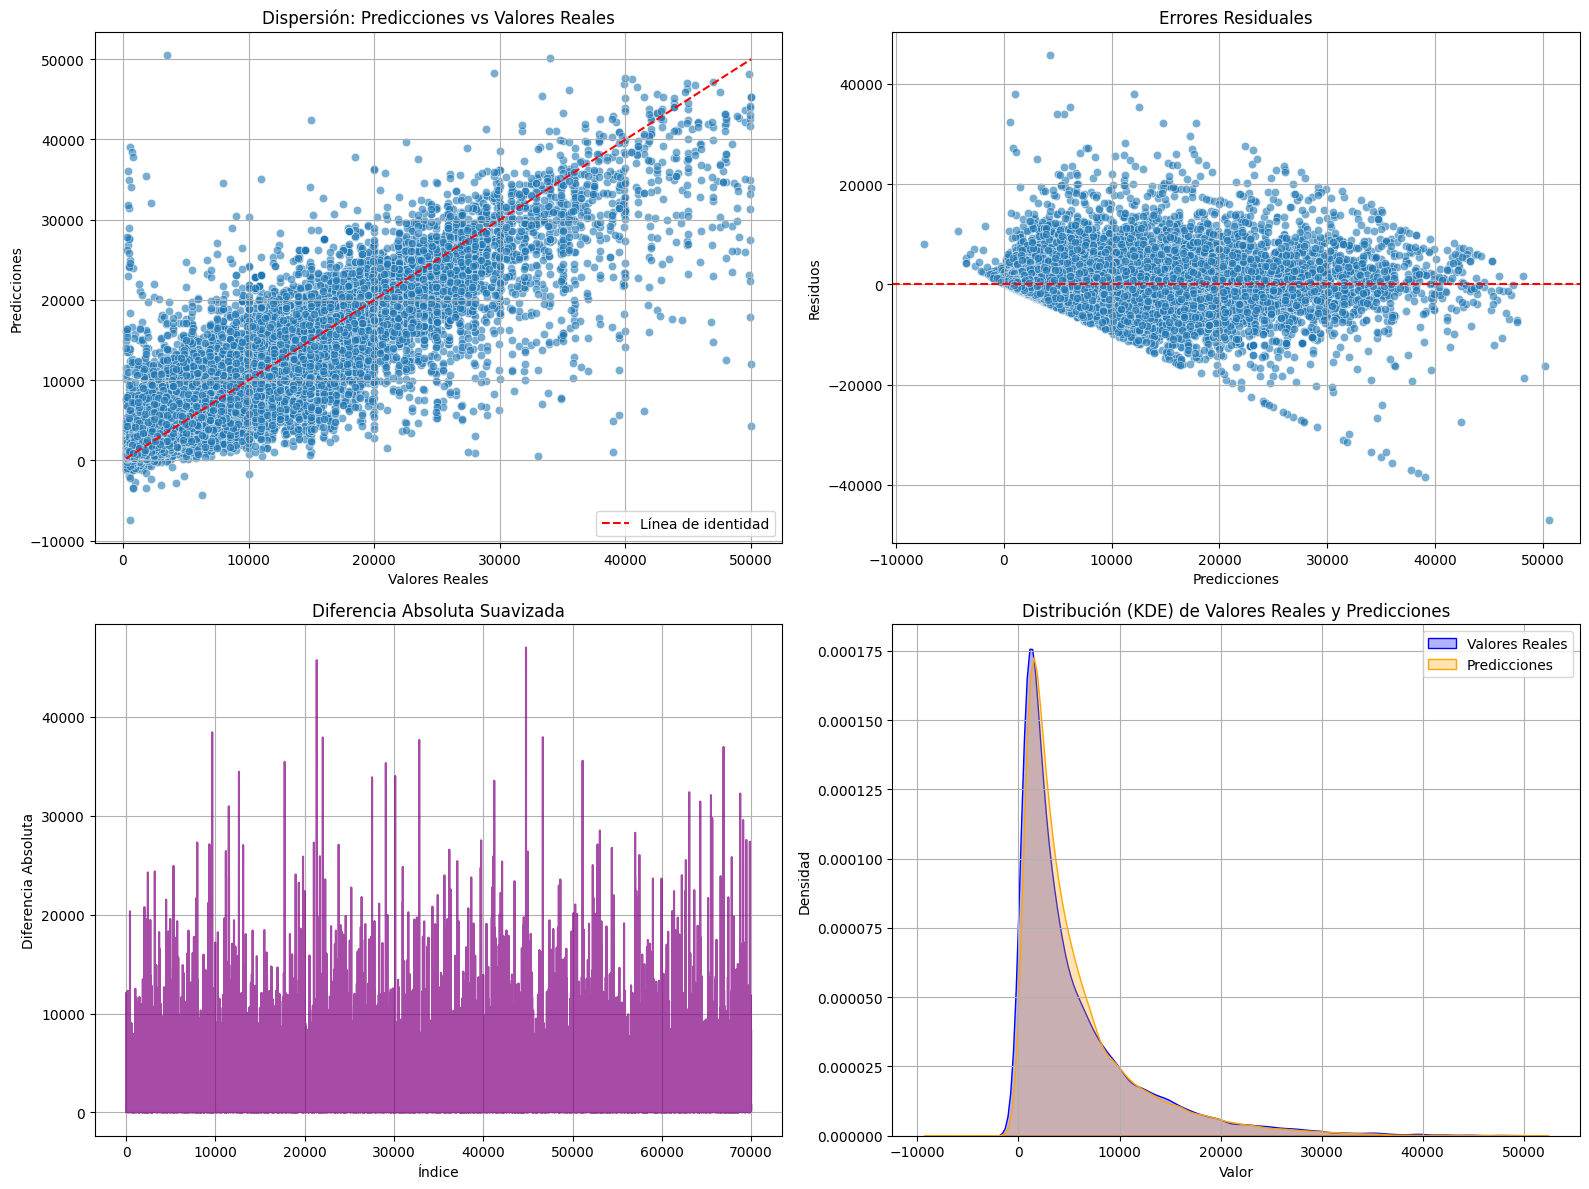

In [7]:
sp.comparativa_graficos(y_test, y_test_pred)

### PROBAMOS A MEJORAR EL MODELO ELIMINANDO VARIABLES CON POCA REPERCUSIÓN

Calculamos la correlación de las variables con "price" para ver cuales pueden ser eliminadas por no ser representativas en el modelo

Correlaciones con 'price':
price                 1.000000
powerCV_robust        0.558097
yearOfRegistration    0.495365
brand                 0.377761
vehicleType           0.340023
gearbox               0.330771
fuelType              0.275689
notRepairedDamage     0.245723
offerType             0.001745
seller                0.000614
abtest                0.000175
kilometer_robust     -0.444155
Name: price, dtype: float64


c:\Users\alexc\Desktop\GIT\8.Regression_model\src\support_GradientBoostingRegressor.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")


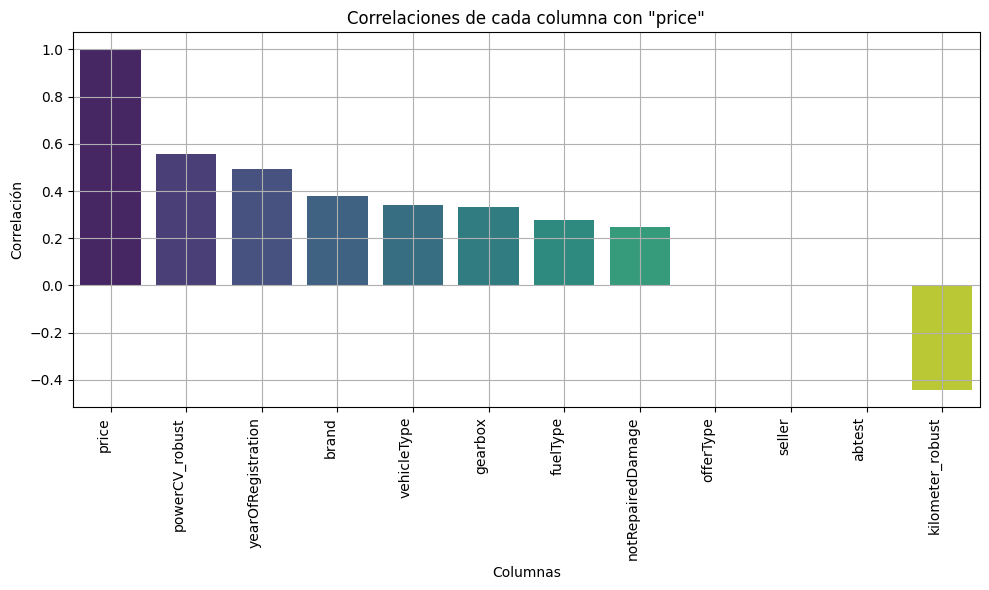


Columnas con baja correlación (abs < 0.05):
['offerType', 'seller', 'abtest']


['offerType', 'seller', 'abtest']

In [8]:
sp.analizar_correlaciones(df, "price", threshold=0.05)

In [9]:
# Excluir columnas irrelevantes según el análisis previo
columns_to_exclude = ['seller', 'offerType', 'abtest']
df_filtered = df.drop(columns=columns_to_exclude)

In [10]:
# Definir las características (X) y la variable objetivo (y)
x2 = df_filtered.drop(columns=['price'])
y2 = df_filtered['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [18]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Crear el GridSearch
grid_search2 = GridSearchCV(GradientBoostingRegressor(random_state=42), 
                           param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error')

grid_search2.fit(x_train2, y_train2)

# Mejor modelo
best_model2 = grid_search2.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


In [19]:
# Predecir en los datos de prueba
y_pred_test2 = best_model2.predict(x_test2)
y_pred_train2 = best_model2.predict(x_train2)
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE
Train,0.8538,1562.9296,6.605849e+06,2570.1846
Test,0.8300,1617.7613,7.562570e+06,2750.0126
Diferenceias,0.0238,-54.8317,-9.567207e+05,-179.8280
Porcentaje diferencia (%),2.8675,-3.5083,-1.448290e+01,-6.9967
Media,5719.2157,5719.2157,5.719216e+03,5719.2157
Influencia media (%),0.0004,0.9587,1.672818e+04,3.1443
Mediana,3200.0000,3200.0000,3.200000e+03,3200.0000
Influencia mediana (%),0.0007,1.7135,2.989752e+04,5.6196


In [ ]:
sp.comparativa_graficos( y_test2, y_pred_test2)

### PRUEBA DE MODELO LIMPIANDO DATOS CON PRECIOS OUTIERS

#### Ahora vamos a tratar de mejorar el modelo por última vez eliminando precios muy extremos que podemos calificar como outiers que generan ruido en el modelo

C:\Users\alexc\AppData\Local\Temp\ipykernel_15384\3737626235.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


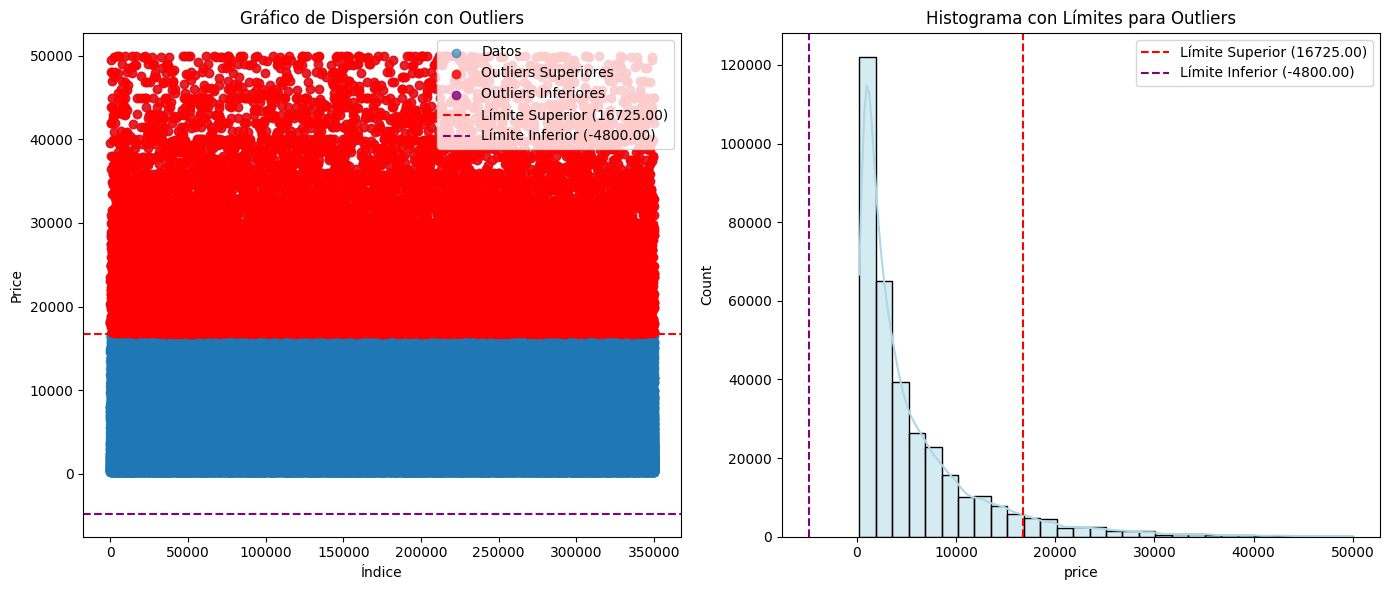

Valores considerados outliers superiores:


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust
1,5722.744529,5722.69042,18300.0,5723.869135,9342.620539,11654.559866,4654.329823,8454.021359,8769.608410,2369.921733,1.072464,-1.0
13,5722.744529,5722.69042,17999.0,5721.515220,12585.761184,11654.559866,4654.329823,8454.021359,4785.776555,6707.871077,1.072464,-3.2
31,5722.744529,5722.69042,18000.0,5723.869135,5212.719911,5236.859483,9965.928441,4702.257069,8229.975718,6707.871077,1.478261,-5.2
53,5722.744529,5722.69042,39600.0,5723.869135,9342.620539,11654.559866,9965.928441,4702.257069,8229.975718,6707.871077,2.739130,-4.8
75,5722.744529,5722.69042,20300.0,5723.869135,5212.719911,11654.559866,9965.928441,8454.021359,8037.616582,6707.871077,1.275362,-2.8
...,...,...,...,...,...,...,...,...,...,...,...,...
349911,5722.744529,5722.69042,19800.0,5723.869135,5212.719911,11654.559866,4654.329823,4702.257069,8229.975718,6707.871077,0.797101,-2.8
349914,5722.744529,5722.69042,23900.0,5721.515220,5845.597432,11654.559866,9965.928441,8454.021359,8229.975718,6707.871077,1.275362,0.0
349920,5722.744529,5722.69042,20500.0,5721.515220,5212.719911,11654.559866,9965.928441,8454.021359,8037.616582,6707.871077,0.304348,-3.6
349936,5722.744529,5722.69042,20400.0,5723.869135,5212.719911,11654.559866,9965.928441,4702.257069,5407.374502,6707.871077,0.507246,-4.8



Valores considerados outliers inferiores:


,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,fuelType,brand,notRepairedDamage,powerCV_robust,kilometer_robust



Umbral superior para considerar outliers: 16725.00
Umbral inferior para considerar outliers: -4800.00


In [12]:
# Cálculo del rango intercuartílico (IQR)
q1 = df['price'].quantile(0.25)  # Primer cuartil
q3 = df['price'].quantile(0.75)  # Tercer cuartil
iqr = q3 - q1

# Definir límites para identificar outliers (tanto superiores como inferiores)
lower_bound = q1 - 1 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar los outliers superiores e inferiores
outliers_superiores = df[df['price'] > upper_bound]
outliers_inferiores = df[df['price'] < lower_bound]

# Visualizar los resultados
plt.figure(figsize=(14, 6))

# Gráfico de dispersión mostrando los valores y los outliers
plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['price'], alpha=0.6, label='Datos')
plt.scatter(outliers_superiores.index, outliers_superiores['price'], color='red', label='Outliers Superiores', alpha=0.8)
plt.scatter(outliers_inferiores.index, outliers_inferiores['price'], color='purple', label='Outliers Inferiores', alpha=0.8)
plt.axhline(upper_bound, color='red', linestyle='--', label=f'Límite Superior ({upper_bound:.2f})')
plt.axhline(lower_bound, color='purple', linestyle='--', label=f'Límite Inferior ({lower_bound:.2f})')
plt.title('Gráfico de Dispersión con Outliers')
plt.xlabel('Índice')
plt.ylabel('Price')
plt.legend()

# Histograma resaltando los outliers
plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=30, kde=True, color='lightblue')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Límite Superior ({upper_bound:.2f})')
plt.axvline(lower_bound, color='purple', linestyle='--', label=f'Límite Inferior ({lower_bound:.2f})')
plt.title('Histograma con Límites para Outliers')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar información sobre los outliers
print("Valores considerados outliers superiores:")
display(outliers_superiores)

print("\nValores considerados outliers inferiores:")
display(outliers_inferiores)

print(f"\nUmbral superior para considerar outliers: {upper_bound:.2f}")
print(f"Umbral inferior para considerar outliers: {lower_bound:.2f}")


In [13]:
# Ver valores atipicos de "price"
limite_inferior = 300
limite_superior = upper_bound

df_filtered_copy=df_filtered.copy()

# Filtro los valores fuera de rango
valores_fuera_rango = df_filtered_copy[(df_filtered_copy['price'] < limite_inferior) | (df_filtered_copy['price'] > limite_superior)]

# Reemplazo los valores fuera de rango por NaN
df_filtered_copy.loc[df_filtered_copy['price'] < limite_inferior, 'price'] = np.nan
df_filtered_copy.loc[df_filtered_copy['price'] > limite_superior, 'price'] = np.nan

# Elimino las filas con NaN en la columna 'price' en el DataFrame original
df_filtered2 = df_filtered_copy.dropna(subset=['price'])

# Ver la forma del DataFrame con valores fuera de rango
valores_fuera_rango.shape

(28283, 9)

In [14]:
# Definir las características (X) y la variable objetivo (y)
x3 = df_filtered2.drop(columns=['price'])
y3 = df_filtered2['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [15]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
 
# Crear el GridSearch
grid_search3 = GridSearchCV(GradientBoostingRegressor(random_state=42), 
                           param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error')

grid_search3.fit(x_train3, y_train3)

# Mejor modelo
best_model3 = grid_search3.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}


In [16]:
# Predecir en los datos de prueba
y_pred_test3 = best_model3.predict(x_test3)
y_pred_train3 = best_model3.predict(x_train3)
sp.metricas(y_train3, y_pred_train3, y_test3, y_pred_test3)

,r2_score,MAE,MSE,RMSE
Train,0.7918,1225.5728,3.185786e+06,1784.8769
Test,0.7765,1260.1707,3.447356e+06,1856.7056
Diferenceias,0.0153,-34.5979,-2.615700e+05,-71.8287
Porcentaje diferencia (%),1.9704,-2.8230,-8.210500e+00,-4.0243
Media,4320.7549,4320.7549,4.320755e+03,4320.7549
Influencia media (%),0.0004,0.8007,6.053802e+03,1.6624
Mediana,2900.0000,2900.0000,2.900000e+03,2900.0000
Influencia mediana (%),0.0005,1.1930,9.019654e+03,2.4769


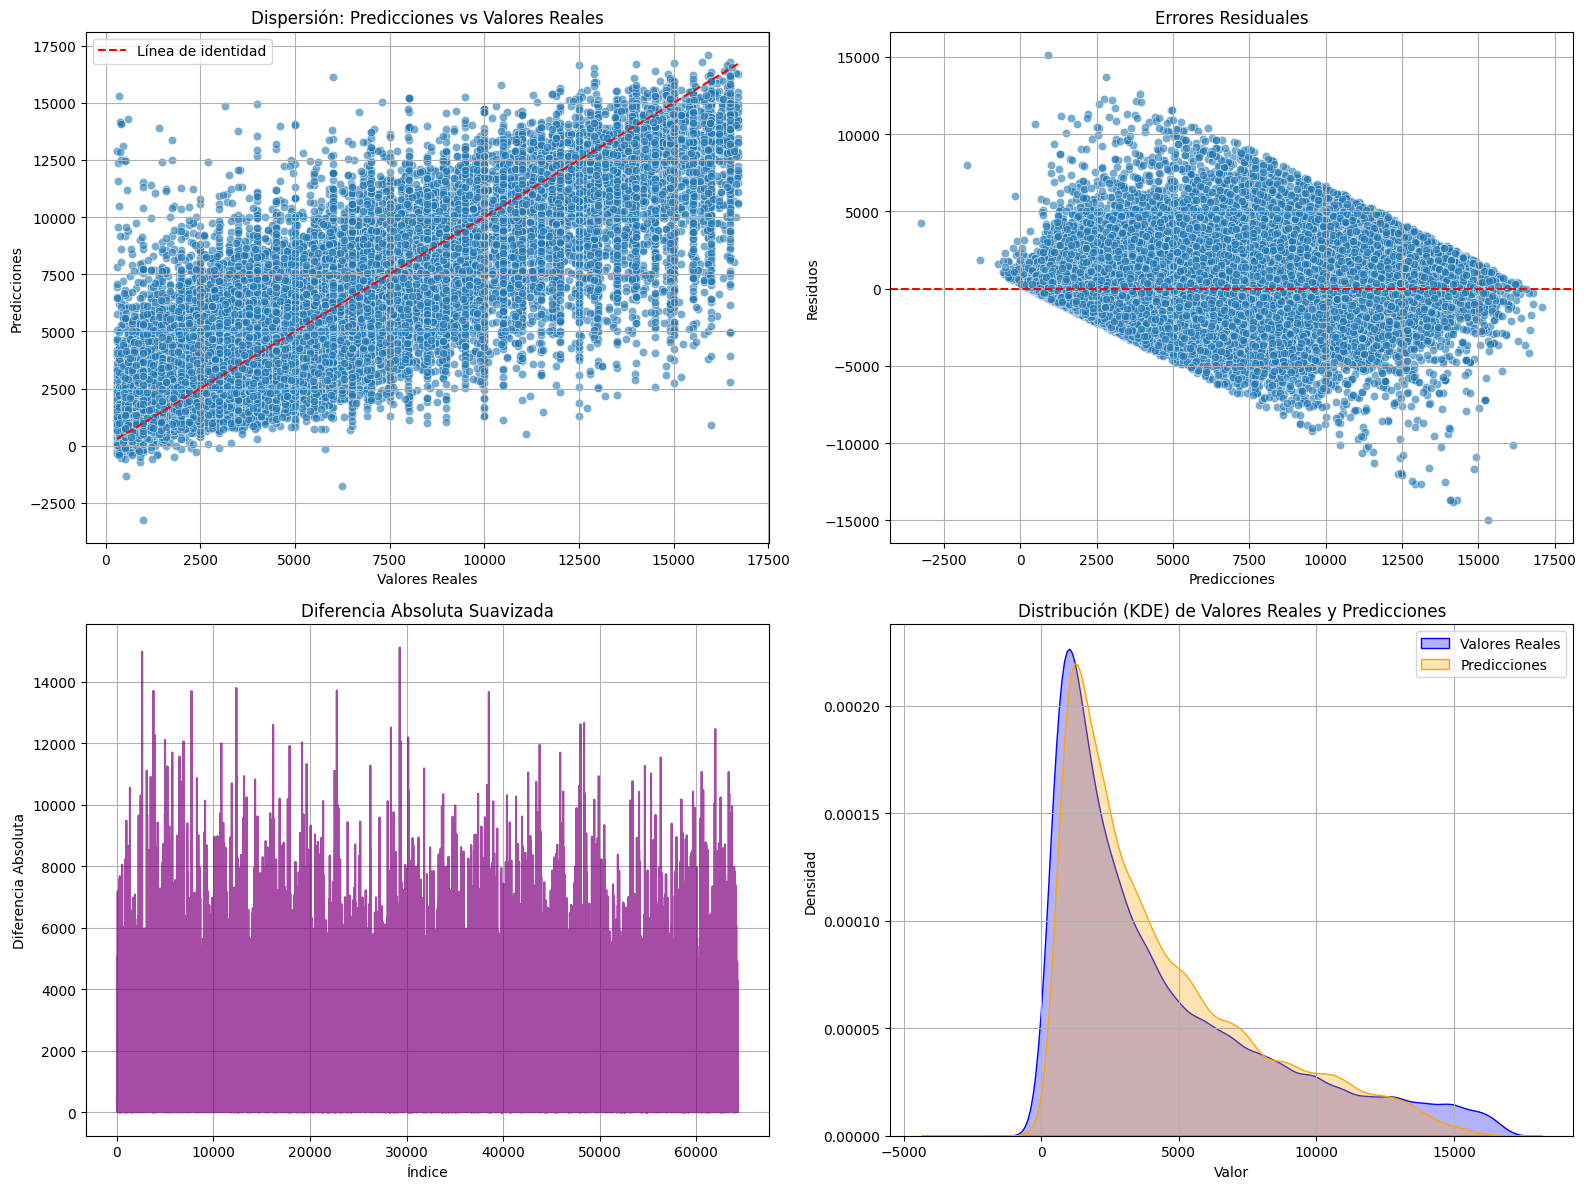

In [17]:
sp.comparativa_graficos( y_test3, y_pred_test3)

#### COMPARATIVA DE METRICAS

In [20]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.8538,1563.2567,6.607321e+06,2570.4709
Test,0.8301,1617.9145,7.558850e+06,2749.3362
Diferenceias,0.0237,-54.6578,-9.515290e+05,-178.8653
Porcentaje diferencia (%),2.8551,-3.4964,-1.440110e+01,-6.9585
Media,5719.2157,5719.2157,5.719216e+03,5719.2157
Influencia media (%),0.0004,0.9557,1.663740e+04,3.1274
Mediana,3200.0000,3200.0000,3.200000e+03,3200.0000
Influencia mediana (%),0.0007,1.7081,2.973528e+04,5.5895


In [21]:
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE
Train,0.8538,1562.9296,6.605849e+06,2570.1846
Test,0.8300,1617.7613,7.562570e+06,2750.0126
Diferenceias,0.0238,-54.8317,-9.567207e+05,-179.8280
Porcentaje diferencia (%),2.8675,-3.5083,-1.448290e+01,-6.9967
Media,5719.2157,5719.2157,5.719216e+03,5719.2157
Influencia media (%),0.0004,0.9587,1.672818e+04,3.1443
Mediana,3200.0000,3200.0000,3.200000e+03,3200.0000
Influencia mediana (%),0.0007,1.7135,2.989752e+04,5.6196


In [22]:
sp.metricas(y_train3, y_pred_train3, y_test3, y_pred_test3)

,r2_score,MAE,MSE,RMSE
Train,0.7918,1225.5728,3.185786e+06,1784.8769
Test,0.7765,1260.1707,3.447356e+06,1856.7056
Diferenceias,0.0153,-34.5979,-2.615700e+05,-71.8287
Porcentaje diferencia (%),1.9704,-2.8230,-8.210500e+00,-4.0243
Media,4320.7549,4320.7549,4.320755e+03,4320.7549
Influencia media (%),0.0004,0.8007,6.053802e+03,1.6624
Mediana,2900.0000,2900.0000,2.900000e+03,2900.0000
Influencia mediana (%),0.0005,1.1930,9.019654e+03,2.4769
